###### Linear Regression

In [103]:
import numpy as np
import pandas as pd
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

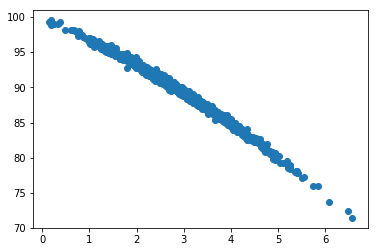

In [104]:
x = np.random.normal(3., 1., 1000)
y = 100 - (x + np.random.normal(0., 0.1, 1000))*3 - 0.2*x**2
plt.scatter(x, y)

In [105]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print slope, intercept, r_value, p_value, std_err

-4.19671657655 101.591014277 -0.994950986187 0.0 0.0134002245899


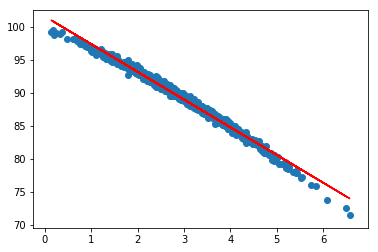

In [106]:
show_x = np.arange(0, 7., 0.001)
plt.plot(x, slope*x + intercept, c = 'r')
plt.scatter(x, y)

###### Polynomial Regression

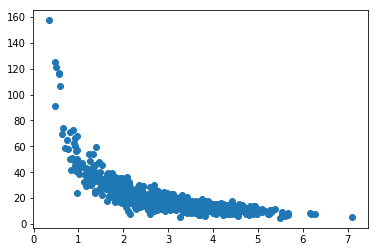

In [107]:
np.random.seed(2)
x = np.random.normal(3., 1., 1000)
y = np.random.normal(50., 10., 1000)/x
plt.scatter(x, y)

In [108]:
p4 = np.poly1d(np.polyfit(x, y, 4))
print p4, type(p4)

        4         3         2
0.5401 x - 8.856 x + 52.25 x - 135.3 x + 147.6 <class 'numpy.lib.polynomial.poly1d'>


In [109]:
vec = np.polyfit(x, y, 4)

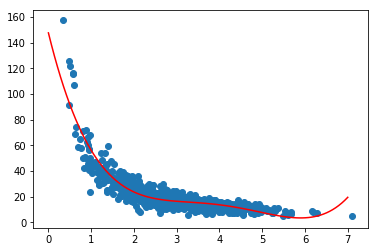

In [110]:
tx = np.linspace(0., 7., 100)
plt.scatter(x, y)
plt.plot(tx, p4(tx), c = 'r')

##### r2_score

In [111]:
from sklearn.metrics import r2_score
r2 = r2_score(y, p4(x))
print r2

0.82937663963


##### Multivariate Regression

In [112]:
df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')
display(df[:3])

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0


In [113]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [114]:
X = df[['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']]
y = df['Price']
X[X.columns] = scale.fit_transform(X)
X['const'] = 1.
display(X[:3])
est = sm.OLS(y, X).fit()
est.summary()

/opt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Mileage,Cylinder,Doors,Cruise,Sound,Leather,const
0,-1.417485,0.52741,0.556279,0.57352,0.687406,0.617611,1.0
1,-1.305902,0.52741,0.556279,0.57352,0.687406,-1.619142,1.0
2,-0.810128,0.52741,0.556279,0.57352,0.687406,-1.619142,1.0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     106.8
Date:                Mon, 26 Feb 2018   Prob (F-statistic):           1.23e-98
Time:                        17:14:07   Log-Likelihood:                -8298.9
No. Observations:                 804   AIC:                         1.661e+04
Df Residuals:                     797   BIC:                         1.664e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1396.7431    260.969     -5.352      0.000   -1909.010    -884.476
Cylinder    4437.5107    281.470     15.765      0.000    3885.000    4990.022
Doors      -1243.3623    261.922     -4.747      0.000   -1757.501    -729.223
Cruise      2678.0936    281.150      9.525      0.000    2126.211    3229.976
Sound       -945.0322    266.423     -3.547      0.000   -1468.006    -422.058
Leather     1487.4879    266.956      5.572      0.000     963.468    2011.507
const       2.134e+04    260.523     81.924      0.000    2.08e+04    2.19e+04
==============================================================================
Omnibus:                      145.941   Durbin-Watson:                   0.304
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.863
Skew:                           1.098   Prob(JB):                     6.15e-57
Kurtosis:                       4.703   Cond. No.                         1.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
y.groupby(df.Cruise).mean()

Cruise
0    13921.865667
1    23784.192266
Name: Price, dtype: float64

In [116]:
print est.params['Mileage']

-1396.74306145


In [117]:
df['pred'] = X.const*est.params['const'] + X.Mileage*est.params['Mileage'] + X.Cylinder*est.params['Cylinder'] + X.Doors*est.params['Doors']

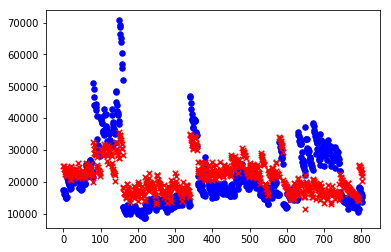

In [118]:
plt.scatter([i for i in range(len(df))], df.Price, marker='o', color="blue", s=30)
plt.scatter([i for i in range(len(df))], df.pred, marker='x', color="red", s=30)